# Geocoding
Обзор геокодеров
Геокодирование, т.е. преобразование адресов в координаты или наоборот, является действительно общей задачей ГИС. К счастью, в Python есть красивые библиотеки, которые делают геокодирование очень простым. Одной из библиотек, которые могут выполнять геокодирование для нас, является география, которая позволяет легко находить координаты адресов, городов, стран и ориентиров по всему миру с использованием сторонних геокодеров и других источников данных.

Как сказано, Geopy использует сторонние геокодеры - то есть службы, которые делают геокодирование, - для поиска адресов и работает с несколькими различными поставщиками услуг, такими как:

ESRI ArcGIS
Карты Baidu
Bing
geocoder.us
GeocodeFarm
GeoNames
API геокодирования Google (V3)
IGN Франция
Mapquest
Поиск Mapzen
NaviData
OpenCage
OpenMapQuest
Открытая карта улицы Номинатим
SmartyStreets
What3words
Яндекс
Таким образом, существует множество геокодеров, на которых можно выбирать! Однако для большинства этих служб вам может потребоваться запросить так называемые ключи доступа API от поставщика услуг, чтобы иметь возможность использовать эту услугу.

К счастью, Nominatim, который представляет собой геокодер на основе данных OpenStreetMap, не требует использования ключа API для использования своих услуг, если он используется для небольших заданий геокодирования, поскольку служба ограничена скоростью до 1 запроса в секунду (3600 / час). Поскольку мы делаем только небольшой набор запросов, мы можем сделать геокодирование с помощью Nominatim.

# Geocoding in Geopandas

Геокодирование возможно в геопандах, используя его интегрированные функциональные возможности геофизики. Geopandas имеет функцию, geocode() которая может геокодировать список адресов (строк) и возвращать GeoDataFrame, содержащий результирующие точечные объекты в geometryстолбце. Приятно, не так ли! Давайте попробуем это.

Загрузите текстовый файл address.txt, который содержит несколько адресов в регионе Хельсинки. Первые строки данных выглядят следующим образом:

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [4]:
fp = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\addresses.txt"
data = pd.read_csv (fp, sep = ';')

In [5]:
data.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


Теперь у нас есть данные в Pandas DataFrame, и мы можем геокодировать наши адреса.

In [6]:
from geopandas.tools import geocode

In [ ]:
from geopy.geocoders import Nominatim

In [10]:
geo = geocode(data['addr'], provider='nominatim')

C:\Users\s.shchus\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [11]:
geo

,geometry,address
0,POINT (24.9155624 60.1632015),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns..."
1,POINT (24.9316914 60.1690222),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."
2,POINT (24.9416849 60.1699637),"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel..."
3,POINT (24.9768441 60.1941864),"Hermannin rantatie, Hermanninranta, Hermanni, ..."
4,POINT (24.9216003 60.1566475),"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län..."
5,POINT (25.0916737 60.237548),"Kontulantie, Kontula, Mellunkylä, Helsinki, He..."
6,POINT (25.1108711 60.2217791),"Itäväylä, Vartioharju, Vartiokylä, Helsinki, H..."
7,POINT (25.0331561080774 60.2777903),"3-5, Tapulikaupungintie, Tapulikaupunki, Suuta..."
8,POINT (25.0291169 60.2636285),"Sompionpolku, Tapanila, Tapaninkylä, Helsinki,..."
9,POINT (24.8710287 60.222498),"Sodexo, 5, Atomitie, Pitäjänmäen teollisuusalu..."


В результате мы имеем GeoDataFrame, который содержит наш исходный адрес и столбец «geometry», содержащий объекты Shapely Point, которые мы можем использовать для экспорта адресов в Shapefile, например. Однако idколонки там нет. Таким образом, нам нужно объединить информацию из dataнашего нового GeoDataFrame geo, тем самым создав Table Join .

# Соединение таблицы
Сочетания таблиц действительно являются общими процедурами при анализе ГИС. Как вы могли бы помнить из наших предыдущих уроков, комбинирование данных из разных таблиц на основе общего keyатрибута можно легко сделать в Pandas / Geopandas с использованием .merge () -функции.

Однако иногда бывает полезно объединить две таблицы вместе с индексом этих DataFrames. В этом случае мы предполагаем, что в наших DataFrames имеется такое же количество записей и что порядок записей должен быть одним и тем же в обоих DataFrames. Фактически, теперь у нас есть такая ситуация, когда мы геокодируем наши адреса, где порядок геокодированных адресов в geoDataFrame такой же, как в нашем исходном dataDataFrame.

Следовательно, мы можем объединить эти таблицы вместе с join()-функцией, которая объединяет два DataFrames вместе по индексу по умолчанию.

In [12]:
join = geo.join (data)

In [13]:
join

,geometry,address,id,addr
0,POINT (24.9155624 60.1632015),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,POINT (24.9316914 60.1690222),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,POINT (24.9416849 60.1699637),"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,POINT (24.9768441 60.1941864),"Hermannin rantatie, Hermanninranta, Hermanni, ...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,POINT (24.9216003 60.1566475),"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"
5,POINT (25.0916737 60.237548),"Kontulantie, Kontula, Mellunkylä, Helsinki, He...",1006,"Kontulantie 18, 00940 Helsinki, Finland"
6,POINT (25.1108711 60.2217791),"Itäväylä, Vartioharju, Vartiokylä, Helsinki, H...",1007,"Itäväylä 3, 00950 Helsinki, Finland"
7,POINT (25.0331561080774 60.2777903),"3-5, Tapulikaupungintie, Tapulikaupunki, Suuta...",1008,"Tapulikaupungintie 3, 00750 Helsinki, Finland"
8,POINT (25.0291169 60.2636285),"Sompionpolku, Tapanila, Tapaninkylä, Helsinki,...",1009,"Sompionpolku 2, 00730 Helsinki, Finland"
9,POINT (24.8710287 60.222498),"Sodexo, 5, Atomitie, Pitäjänmäen teollisuusalu...",1010,"Atomitie 5, 00370 Helsinki, Finland"


In [14]:
type (join)

geopandas.geodataframe.GeoDataFrame

In [15]:
outfp = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\Results\addresses.shp"
join.to_file (outfp)

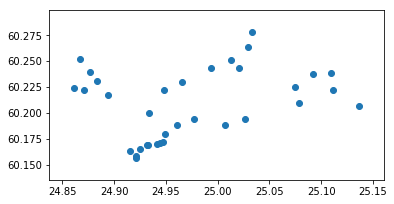

In [20]:
join.plot();